In [1]:
import tensorflow as tf
tf.reset_default_graph()

import numpy as np
np.random.seed(1337)  # for reproducibility
import struct
from sklearn import svm, metrics
import matplotlib.pyplot as plt
import itertools
%matplotlib inline
import sys
import os
sys.path.append("./models")
sys.path.append("./base")
from dbn import DBN
from cnn import CNN
from sup_sae import supervised_sAE
from base_func import Initializer,Summaries
from tensorflow.examples.tutorials.mnist import input_data

# Loading dataset
# Each datapoint is a 8x8 image of a digit.



/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Use the retry module or similar alternatives.


In [2]:
mnist = input_data.read_data_sets('./dataset/MNIST_data', one_hot=True)

# Splitting data
X_train, Y_train, X_test, Y_test = mnist.train.images,mnist.train.labels,mnist.test.images , mnist.test.labels

#X_train, X_test = X_train[::100], X_test[::100]
#Y_train, Y_test = Y_train[::100], Y_test[::100]
x_dim=X_train.shape[1] 
y_dim=Y_train.shape[1] 
p_dim=int(np.sqrt(x_dim))

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./dataset/MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./dataset/MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./dataset/MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./dataset/MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternati

In [4]:
sess = tf.Session()
# Training

classifier = DBN(output_act_func='softmax',
             loss_func='cross_entropy',
             use_for='classification',
             bp_algorithm='adam',
             dbn_lr=1e-3,
             momentum=0.5,
             dbn_epochs=100,
             dbn_struct=[x_dim, 200, 100, y_dim],
             rbm_v_type='bin',
             rbm_epochs=12,
             batch_size=32,
             cd_k=1,
             rbm_lr=1e-3,
             dropout=1)



Initializer.sess_init_all(sess) 
summ = Summaries("./base",sess=sess)
classifier.train_model(X_train, Y_train,sess,summ)

# Test
print("[Test data...]")
Y_pred = classifier.test_model(X_test, Y_test,sess)

summ.train_writer.close()
sess.close()

Start Pre-training...
>>> Training RBM-1:
>>> epoch = 1 , loss = 0.2263
>>> epoch = 2 , loss = 0.205
>>> epoch = 3 , loss = 0.1879
>>> epoch = 4 , loss = 0.1984
>>> epoch = 5 , loss = 0.1841
>>> epoch = 6 , loss = 0.1778
>>> epoch = 7 , loss = 0.1741
>>> epoch = 8 , loss = 0.1734
>>> epoch = 9 , loss = 0.1586
>>> epoch = 10 , loss = 0.1598
>>> epoch = 11 , loss = 0.154
>>> epoch = 12 , loss = 0.1664
>>> Training RBM-2:
>>> epoch = 1 , loss = 0.3283
>>> epoch = 2 , loss = 0.2858
>>> epoch = 3 , loss = 0.258
>>> epoch = 4 , loss = 0.2465
>>> epoch = 5 , loss = 0.235
>>> epoch = 6 , loss = 0.2192
>>> epoch = 7 , loss = 0.2119
>>> epoch = 8 , loss = 0.2103
>>> epoch = 9 , loss = 0.2067
>>> epoch = 10 , loss = 0.1908
>>> epoch = 11 , loss = 0.1957
>>> epoch = 12 , loss = 0.195
Start Fine-tuning...
>>> epoch = 1 , loss = 1.471
>>> epoch = 2 , loss = 1.483
>>> epoch = 3 , loss = 1.509
>>> epoch = 4 , loss = 1.519
>>> epoch = 5 , loss = 1.462
>>> epoch = 6 , loss = 1.504
>>> epoch = 7 , loss =

In [24]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    accuracy=np.mean(np.amax(cm,axis=1))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return accuracy

In [22]:
def onehottolabel(d):
    lbl=d.argmax(axis=0)
    return lbl
y_pred_label=onehottolabel(y_pred)
y_true_label=onehottolabel(Y_test)

np.save('y_pred_label.npy',y_pred_label)
np.save('y_true_label.npy',y_true_label)

In [5]:
y_pred=np.load('y_pred_label.npy')
y_true=np.load('y_true_label.npy')

In [16]:
from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

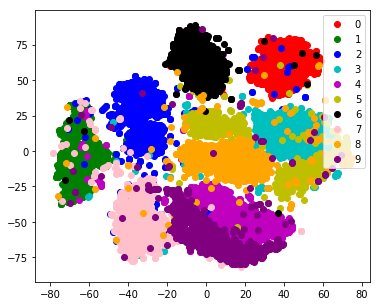

In [20]:

tsne = TSNE(n_components=2, random_state=0)
X_2d = tsne.fit_transform(X_test)
target_ids = range(10)
plt.figure(figsize=(6, 5))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'pink', 'orange', 'purple'
for i, c, label in zip(target_ids, colors, np.array([0,1,2,3,4,5,6,7,8,9])):
    plt.scatter(X_2d[y_true == i, 0], X_2d[y_true == i, 1], c=c, label=label)
plt.legend()
plt.show()

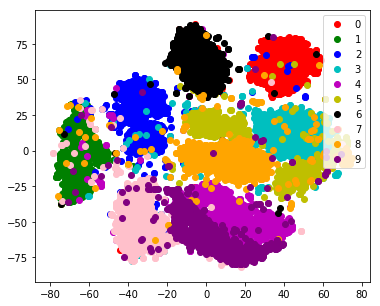

In [21]:
tsne = TSNE(n_components=2, random_state=0)
X_2d = tsne.fit_transform(X_test)
target_ids = range(10)
plt.figure(figsize=(6, 5))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'pink', 'orange', 'purple'
for i, c, label in zip(target_ids, colors, np.array([0,1,2,3,4,5,6,7,8,9])):
    plt.scatter(X_2d[y_pred == i, 0], X_2d[y_pred == i, 1], c=c, label=label)
plt.legend()
plt.show()

Normalized confusion matrix
accuracy is:  0.9769466469956705


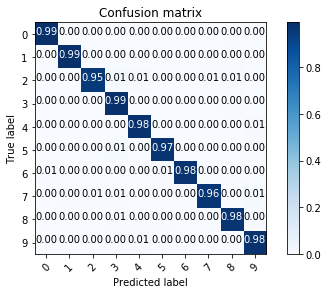

In [25]:
cm = metrics.confusion_matrix(y_true, y_pred)
accuracy=plot_confusion_matrix(cm, ["0","1","2","3","4","5","6","7","8","9"],normalize=True)
print ('accuracy is: ',accuracy)